# 김해시 화제 예측
# Pre-Processing

In [4]:
import pandas as pd
train1 = pd.read_csv("C:/Users/USER/Desktop/19-2학기/핸즈온 스터디/김해/PJT002_train.csv", encoding = 'utf-8')
test1 = pd.read_csv('C:/Users/USER/Desktop/19-2학기/핸즈온 스터디/김해/PJT002_test.csv', encoding = 'utf-8')
train = train1.drop("fr_yn", axis = 1)
train_labels = train1["fr_yn"].copy()

In [5]:
train.info()
train.head()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Columns: 179 entries, dt_of_fr to cltrl_hrtg_yn
dtypes: float64(147), int64(12), object(20)
memory usage: 80.8+ MB


(59199, 179)

In [10]:
pd.crosstab(test1['ttl_grnd_flr'],test1['ttl_dwn_flr'])

ttl_dwn_flr,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,15.0,18.0
ttl_grnd_flr,,,,,,,,,,,,,,,
1.0,969,6,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,597,26,0,0,0,0,0,0,0,0,0,0,0,0,0
3.0,415,24,2,0,0,0,0,0,0,0,0,0,0,0,0
4.0,178,25,0,0,0,0,0,0,0,0,0,0,0,0,0
5.0,71,22,2,0,0,0,0,0,0,0,0,0,0,0,0
6.0,33,9,4,0,0,0,0,0,0,0,0,0,0,0,0
7.0,15,7,0,1,0,0,0,0,0,0,0,0,0,0,0
8.0,18,5,3,1,0,0,0,0,0,0,0,0,0,0,0
9.0,14,5,5,1,2,0,0,0,0,0,0,0,0,0,0


In [3]:
train_labels

0        Y
1        N
2        N
3        Y
4        N
5        N
6        Y
7        N
8        N
9        N
10       N
11       Y
12       N
13       Y
14       N
15       N
16       Y
17       N
18       Y
19       N
20       Y
21       N
22       Y
23       N
24       N
25       N
26       N
27       N
28       N
29       N
        ..
59169    N
59170    N
59171    N
59172    N
59173    N
59174    Y
59175    N
59176    N
59177    N
59178    N
59179    Y
59180    Y
59181    N
59182    N
59183    N
59184    N
59185    N
59186    Y
59187    N
59188    N
59189    N
59190    N
59191    Y
59192    Y
59193    N
59194    Y
59195    N
59196    N
59197    N
59198    N
Name: fr_yn, Length: 59199, dtype: object

In [4]:
train_cat = train.loc[:,train.dtypes == 'object']
train_num = train.loc[:,train.dtypes != 'object']
#X_int = train.loc[:, train.dtypes == 'int64']
#X_float = train.loc[:, train.dtypes == 'float64']

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
class StrImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strimpute = False):
        self.strimpute = strimpute
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.astype("str")

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_att = list(train_num)
cat_att = list(train_cat)

num_pipeline = Pipeline([
    ('median imputer', SimpleImputer(strategy = "median")),
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('strimpute',StrImputer()),
    ('imputer', SimpleImputer(strategy = "most_frequent")),
    ('onehot encoder', OneHotEncoder(categories = 'auto')),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_att),
    ("cat", cat_pipeline, cat_att),
])

In [11]:
#train_num_pre = num_pipeline.fit_transform(train_num)
#train_cat_pre = cat_pipeline.fit_transform(train_cat) - 에
train_pre = full_pipeline.fit_transform(train)

In [42]:
#from sklearn.preprocessing import OrdinalEncoder
#enc = OrdinalEncoder()
#X = [['Male', 1], ['Female', 3], ['Female', 2]]
#print(enc.fit_transform(X))
#print(X)

In [12]:
print(train_pre.shape)
print(train.shape)

(59199, 70868)
(59199, 172)


# Oversampling - ADASYN

In [13]:
from collections import Counter
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state = 42)
X_res, y_res = ada.fit_resample(train_pre, train_labels)

In [14]:
print('ADASYN resample dataset shape %s' % Counter(y_res))

ADASYN resample dataset shape Counter({'N': 51542, 'Y': 51295})


# randomized PCA - 실패

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 42)
from sklearn.decomposition import PCA
rm_PCA = PCA(n_components = .9999, svd_solver = 'randomized')
rm_PCA.fit(X_train)
X_train_PCA = rm_PCA.transform(X_train)
X_test_PCA = rm_PCA.transform(X_test)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
print(rm_PCA.explained_variance_ratio_)
print(sum(rm_PCA.explained_variance_ratio_)) # 99.999989% 

# CART

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', min_impurity_decrease = 0.005, random_state=42) 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [19]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_c_matrix = confusion_matrix(y_test, y_test_pred)
train_c_matrix = confusion_matrix(y_train, y_train_pred)

In [23]:
print(test_c_matrix)
print(train_c_matrix)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

[[10243  2693]
 [ 1391 11383]]
[[30810  7796]
 [ 4162 34359]]
0.8449570189427826
0.8411513029949436


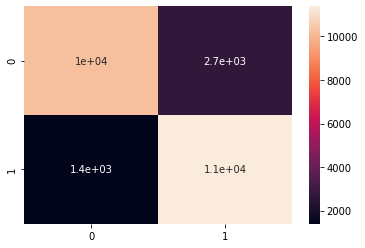

In [24]:
sns.heatmap(test_c_matrix, annot = True)

# Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1e1,1e2,1e3]}
mp_SVC=GridSearchCV(LinearSVC(max_iter = 1000), param_grid, cv=3)
mp_SVC.fit(X_train_PCA,y_train)

In [ ]:
y_train_pred = mp_SVC.predict(X_train_PCA)
y_test_pred = mp_SVC.predict(X_test_PCA)
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_c_matrix = confusion_matrix(y_test, y_test_pred)
train_c_matrix = confusion_matrix(y_train, y_train_pred)

In [ ]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred= lr.predict(X_train)
y_test_pred = lr.predict(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
from sklearn import metrics
print(metrics.f1_score(y_train, y_train_pred, pos_label='Y'))
print(metrics.f1_score(y_test, y_test_pred, pos_label='Y'))

0.9252331931757769
0.8976691301876067
